In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Libraries, data, and functions

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import pandas as pd
import mpl_toolkits.mplot3d as plt3d
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Reshape, Dropout, Activation, Flatten, Conv1D, MaxPooling1D, UpSampling1D, Input
from tensorflow.keras.models import Model, Sequential
from sklearn.model_selection import train_test_split

In [3]:
def loss_function(y_true, y_pred):

  bs = len(y_true)
  y_true, y_pred = tf.reshape(y_true, (bs,3,3)), tf.reshape(y_pred,(bs,3,3)) 

  perm_rows = tf.linalg.LinearOperatorPermutation([1,2,0])
  true_dist = tf.sqrt(tf.reduce_sum(tf.math.squared_difference( y_true, tf.matmul(perm_rows,y_true) ), axis=-1, keepdims=True))
  pred_dist = tf.sqrt(tf.reduce_sum(tf.math.squared_difference( y_pred, tf.matmul(perm_rows,y_pred) ), axis=-1, keepdims=True))

  return tf.reduce_sum( tf.abs( tf.math.subtract(true_dist, pred_dist) ) , axis = 1)  

In [4]:
#Function which plots the 3D traingle
minmax = (-1,1)

def Plot_2(v1, v2, v3, vv1, vv2, vv3):
  fig = plt.figure()
  fig.set_size_inches(5,5)
  ax = fig.add_subplot(111, projection='3d')
  
  X = np.array([v1,v2,v3])
  Y = np.array([vv1,vv2,vv3])
  
  l0x, ll0x = np.linspace(v1[0], v2[0], 50), np.linspace(vv1[0], vv2[0], 50)
  l1x, ll1x = np.linspace(v2[0], v3[0], 50), np.linspace(vv2[0], vv3[0], 50)
  l2x, ll2x = np.linspace(v3[0], v1[0], 50), np.linspace(vv3[0], vv1[0], 50)
  l0y, ll0y = np.linspace(v1[1], v2[1], 50), np.linspace(vv1[1], vv2[1], 50)
  l1y, ll1y = np.linspace(v2[1], v3[1], 50), np.linspace(vv2[1], vv3[1], 50)
  l2y, ll2y = np.linspace(v3[1], v1[1], 50), np.linspace(vv3[1], vv1[1], 50)
  l0z, ll0z = np.linspace(v1[2], v2[2], 50), np.linspace(vv1[2], vv2[2], 50)
  l1z, ll1z = np.linspace(v2[2], v3[2], 50), np.linspace(vv2[2], vv3[2], 50)
  l2z, ll2z = np.linspace(v3[2], v1[2], 50), np.linspace(vv3[2], vv1[2], 50)

  #Drawing lines
  ax.scatter(l0x, l0y, l0z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll0x, ll0y, ll0z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l1x, l1y, l1z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll1x, ll1y, ll1z, color='black', marker='s', s = 1, alpha = 0.1)
  ax.scatter(l2x, l2y, l2z, color='red', marker='s', s = 1, alpha = 0.1), ax.scatter(ll2x, ll2y, ll2z, color='black', marker='s', s = 1, alpha = 0.1)


  #plot the nodes
  for x, y, z in X:
    ax.scatter(x, y, z, color='red', marker='o', s=30)
  for x, y, z in Y:
    ax.scatter(x, y, z, color='black', marker='o', s=30)

  ax.set_xlim(minmax)
  ax.set_ylim(minmax) 
  ax.set_zlim(minmax) 

In [5]:
def side_lens(v):
  vx,vy,vz = np.array_split(v , 3)
  return np.array([np.linalg.norm(vx-vy), 
                   np.linalg.norm(vy-vz), 
                   np.linalg.norm(vz-vx)])

This cell is for importing larger datasets from google drive instead of remaking them.

### Loading the encoder, and decoder models


In [6]:
# Actual Model
sym_mod = keras.models.load_model("/content/drive/MyDrive/Project/Custom_loss/Symm_AE2"        , compile=False )     # Symmetric permuted data
per_mod = keras.models.load_model("/content/drive/MyDrive/Project/Custom_loss/Symm_AE2_No_Perm", compile=False )     # No permutation
rnd_mod = keras.models.load_model("/content/drive/MyDrive/Project/Custom_loss/Symm_AE2_norm"   , compile=False )     # Completely random

sym_mod.compile(loss=loss_function)
per_mod.compile(loss=loss_function)
rnd_mod.compile(loss=loss_function)

In [7]:
input   = sym_mod.get_layer(index = 0)
l1      = sym_mod.get_layer(index = 1)
latent  = sym_mod.get_layer(index = 2)

#Building sym encoder
enc_sym = Sequential()
enc_sym.add(input )
enc_sym.add(l1    )
enc_sym.add(latent)
enc_sym.summary()

input   = per_mod.get_layer(index = 0)
l1      = per_mod.get_layer(index = 1)
latent  = per_mod.get_layer(index = 2)


#Building perm encoder
enc_per = Sequential()
enc_per.add(input )
enc_per.add(l1    )
enc_per.add(latent)
enc_per.summary()

input   = rnd_mod.get_layer(index = 0)
l1      = rnd_mod.get_layer(index = 1)
latent  = rnd_mod.get_layer(index = 2)


#Building rnd encoder
enc_rnd = Sequential()
enc_rnd.add(input )
enc_rnd.add(l1    )
enc_rnd.add(latent)
enc_rnd.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 256)               2560      
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 514       
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 514       
Total params: 3,074
Trainable params: 3,074
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_2"
________

## **LJ-Potential** --   $V_{\mathrm{LJ}}(r)=4\left(\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right)$

In [8]:
def LJ(r, A, B):
  return 4*( (A/r)**12 - (B/r)**6) 

### Generating Data

$$
V_{\mathrm{LJ}}=\left[\left(\frac{\sigma}{r}\right)^{12}-\left(\frac{\sigma}{r}\right)^{6}\right]
$$
$$
r=r_{min}=2^{1 / 6} \sigma
$$



In [9]:
df_sym = pd.read_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/Symm_data.csv')
df_rnd = pd.read_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/Symm_data_norm.csv')
df_per = pd.read_csv('/content/drive/My Drive/Project/Autoencoder triangular molecule/training/Symm_data_no_perm.csv')

In [10]:
DATA_SIZE = 200000
r_min     = 0.48   # Need a minimum as in nature the pole at r = 0 is non-phyiscal
sigma     =  .5    # Scaling for LJ

In [11]:
# Euclidean data
x_data_sym = np.array([df_sym['x1'],df_sym['y1'],df_sym['z1'],
                       df_sym['x2'],df_sym['y2'],df_sym['z2'],
                       df_sym['x3'],df_sym['y3'],df_sym['z3'] ]).T
                   
x_data_rnd = np.array([df_rnd['x1'],df_rnd['y1'],df_rnd['z1'],
                       df_rnd['x2'],df_rnd['y2'],df_rnd['z2'],
                       df_rnd['x3'],df_rnd['y3'],df_rnd['z3'] ]).T

x_data_per = np.array([df_per['x1'],df_per['y1'],df_per['z1'],
                       df_per['x2'],df_per['y2'],df_per['z2'],
                       df_per['x3'],df_per['y3'],df_per['z3'] ]).T


# Side len data
x_side_sym  = np.array([df_sym['L1'],
                        df_sym['L2'],
                        df_sym['L3']]).T

x_side_rnd  = np.array([df_rnd['L1'],
                        df_rnd['L2'],
                        df_rnd['L3']]).T

x_side_per  = np.array([df_per['L1'],
                        df_per['L2'],
                        df_per['L3']]).T                       


print('Perm:',x_side_per[:3], '\n\n'
      'Sym:', x_side_sym[:3], '\n\n'
      'Rnd:', x_side_rnd[:3], '\n\n')

sym_mod.evaluate(x = x_data_sym, y = x_data_sym)
rnd_mod.evaluate(x = x_data_rnd, y = x_data_rnd)
per_mod.evaluate(x = x_data_per, y = x_data_per)

Perm: [[0.68       0.76448204 0.86659383]
 [0.68       0.62068994 0.85335304]
 [0.68       0.61006631 0.84834228]] 

Sym: [[0.68       0.9803883  0.81502503]
 [0.57015502 0.68       0.55567349]
 [0.55480074 0.68       0.63801778]] 

Rnd: [[0.77637177 0.65225594 0.62416536]
 [0.50502782 0.60138949 0.65661537]
 [0.77824986 1.1738423  0.58082895]] 


6250/6250 [==============================] - 6s 938us/step - loss: 0.0052


0.005202647764235735

In [12]:
# Creating an array with the LJ-Energy for each particle
ei_sym = LJ(x_side_sym, sigma,sigma)
ei_per = LJ(x_side_per, sigma,sigma)
ei_rnd = LJ(x_side_rnd, sigma,sigma)

# Summing and multiplying by two to retrieve the molecules tot en
y_data_sym = np.array(2*(np.sum(ei_sym, axis = 1)))
y_data_per = np.array(2*(np.sum(ei_per, axis = 1)))
y_data_rnd = np.array(2*(np.sum(ei_rnd, axis = 1)))

In [13]:
df_sym = pd.DataFrame()
df_sym['x1'] = x_data_sym[:,0];   df_sym['x2'] = x_data_sym[:,3];   df_sym['x3'] = x_data_sym[:,6];
df_sym['y1'] = x_data_sym[:,1];   df_sym['y2'] = x_data_sym[:,4];   df_sym['y3'] = x_data_sym[:,7];
df_sym['z1'] = x_data_sym[:,2];   df_sym['z2'] = x_data_sym[:,5];   df_sym['z3'] = x_data_sym[:,8];
df_sym['N1'] = x_data_sym[:,0];   df_sym['N2'] = x_data_sym[:,1];   df_sym['N3'] = x_data_sym[:,2];
df_sym['En'] = y_data_sym

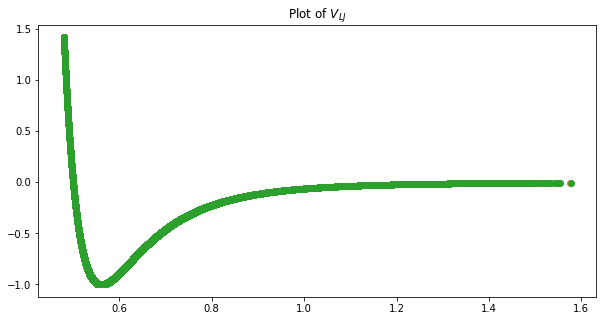

Max Side= 1.6125012994354349 Min Side= 0.4800046699735402
Max Side= 1.5820369646827668 Min Side= 0.4800019615694225
Max Side= 1.579904698298682 Min Side= 0.4800006732940396


In [14]:

# Plotting as a fn of 1 side lenght
plt.figure( figsize=(10,5) )
plt.title('Plot of $V_{LJ}$')
plt.scatter(x_side_per[:,0], LJ(x_side_per[:,0],sigma,sigma) )
plt.scatter(x_side_sym[:,1], LJ(x_side_sym[:,1],sigma,sigma) )
plt.scatter(x_side_rnd[:,2], LJ(x_side_rnd[:,2],sigma,sigma) )
plt.show()

print('Max Side=',np.max(x_side_per),'Min Side=', np.min(x_side_per))
print('Max Side=',np.max(x_side_sym),'Min Side=', np.min(x_side_sym))
print('Max Side=',np.max(x_side_rnd),'Min Side=', np.min(x_side_rnd))

$E = \Sigma_{nearest}(\epsilon_1+\epsilon_2+\epsilon_3) = 2(\epsilon_1+\epsilon_2+\epsilon_3)$

In [15]:
# Using the encoder to generate latent space points
x_sym_lat = enc_sym.predict(x_data_sym)
x_per_lat = enc_per.predict(x_data_per)
x_rnd_lat = enc_rnd.predict(x_data_rnd)
x_sid     = np.array([side_lens(i) for i in x_data_sym])
x_sid     = np.delete(x_sid,[0],-1)

### Prepping/loading data

In [16]:
scaler = MinMaxScaler()


x_sym_lat  = scaler.fit_transform(x_sym_lat)
y_data_sym = scaler.fit_transform(y_data_sym.reshape((len(y_data_sym),1)))
 
x_per_lat  = scaler.fit_transform(x_per_lat)
y_data_per = scaler.fit_transform(y_data_per.reshape((len(y_data_sym),1)))

x_rnd_lat  = scaler.fit_transform(x_rnd_lat)
y_data_rnd = scaler.fit_transform(y_data_rnd.reshape((len(y_data_sym),1)))

In [17]:
print((x_rnd_lat), 
      (y_data_rnd),
      (x_per_lat), 
      (y_data_per),
      (x_rnd_lat), 
      (y_data_sym))

[[0.23450461 0.7280581 ]
 [0.24465351 0.95624536]
 [0.6697475  0.63253397]
 ...
 [0.2834511  0.6393745 ]
 [0.20520125 0.80803406]
 [0.34002006 0.74007636]] [[0.22065637]
 [0.21350332]
 [0.29475973]
 ...
 [0.25058465]
 [0.23021474]
 [0.395706  ]] [[0.26980573 0.3341456 ]
 [0.14155996 0.31240165]
 [0.13405626 0.30916542]
 ...
 [0.48424324 0.41023362]
 [0.7973749  0.41956294]
 [0.33898777 0.31403974]] [[0.33651868]
 [0.22522824]
 [0.21324412]
 ...
 [0.39731302]
 [0.4076564 ]
 [0.35734335]] [[0.23450461 0.7280581 ]
 [0.24465351 0.95624536]
 [0.6697475  0.63253397]
 ...
 [0.2834511  0.6393745 ]
 [0.20520125 0.80803406]
 [0.34002006 0.74007636]] [[0.36733227]
 [0.00251064]
 [0.06226589]
 ...
 [0.20462623]
 [0.46817538]
 [0.19137382]]


In [18]:
print(np.min(x_rnd_lat), np.max(x_rnd_lat),
      np.min(y_data_rnd), np.max(y_data_rnd),
      np.min(x_per_lat), np.max(x_per_lat),
      np.min(y_data_per), np.max(y_data_per),
      np.min(x_rnd_lat), np.max(x_rnd_lat),
      np.min(y_data_sym), np.max(y_data_sym))

0.0 1.0 0.0 1.0 0.0 1.0000001 0.0 1.0 0.0 1.0 0.0 1.0


In [19]:
# Splitting the array into validation, training, and test sets

x_train_sid,  x_val_sid  = train_test_split(x_sid , test_size = 0.1  , shuffle = False)
x_train_sid, x_test_sid = train_test_split(x_train_sid, test_size = 1./9., shuffle = False)

# Latent variables training x-data
x_train_lat_sym, x_val_lat_sym  = train_test_split(x_sym_lat , test_size = 0.1  , shuffle = False)
x_train_lat_sym, x_test_lat_sym = train_test_split(x_train_lat_sym, test_size = 1./9., shuffle = False)

# Latent variables training x-data
x_train_lat_rnd, x_val_lat_rnd = train_test_split(x_rnd_lat, test_size = 0.1  , shuffle = False)
x_train_lat_rnd, x_test_lat_rnd = train_test_split(x_train_lat_rnd, test_size = 1./9., shuffle = False)

# Latent variables training x-data
x_train_lat_per, x_val_lat_per = train_test_split(x_per_lat , test_size = 0.1  , shuffle = False)
x_train_lat_per, x_test_lat_per = train_test_split(x_train_lat_per, test_size = 1./9., shuffle = False)

# Energy y-data
y_train_per,  y_val_per          = train_test_split(y_data_per     , test_size = 0.1  , shuffle = False)
y_train_per, y_test_per         = train_test_split(y_train_per    , test_size = 1./9., shuffle = False)

y_train_sym,  y_val_sym          = train_test_split(y_data_sym     , test_size = 0.1  , shuffle = False)
y_train_sym, y_test_sym         = train_test_split(y_train_sym    , test_size = 1./9., shuffle = False)

y_train_rnd,  y_val_rnd          = train_test_split(y_data_rnd     , test_size = 0.1  , shuffle = False)
y_train_rnd, y_test_rnd         = train_test_split(y_train_rnd    , test_size = 1./9., shuffle = False)

## Models

In [20]:
def model():
  inp = Input((2,))
  x = Dense( 64, activation = tf.keras.layers.LeakyReLU()    )(inp)
  x = Dense( 32, activation = tf.keras.layers.LeakyReLU()    )(x)
  x = Dense( 16, activation = tf.keras.layers.LeakyReLU()    )(x)
  x = Dense(  1, activation = 'linear'         )(x)

  return Model(inp, x)

In [21]:
# Side model
en_predictor_sym = model()
en_predictor_sym.compile(optimizer=keras.optimizers.Adam(amsgrad=True), loss='mse')

In [22]:
# Latent Model 
en_predictor_per = model()
en_predictor_per.compile(optimizer=keras.optimizers.Adam(amsgrad=True), loss='mse')

In [23]:
# Euclid Model 
en_predictor_rnd = model()
en_predictor_rnd.compile(optimizer=keras.optimizers.Adam(amsgrad=True), loss='mse')

In [24]:
# 2 side Model 
en_predictor_sid = model()
en_predictor_sid.compile(optimizer=keras.optimizers.Adam(amsgrad=True), loss='mse')

## Train


In [25]:
# Symmetry data side lenghts with one side removed

history_sid = en_predictor_sid.fit(x_train_sid, y_train_sym,
                                  validation_data=(x_val_sid, y_val_sym),
                                  epochs=500)

Epoch 1/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0104 - val_loss: 0.0069
Epoch 2/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0061 - val_loss: 0.0050
Epoch 3/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0049 - val_loss: 0.0048
Epoch 4/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0048 - val_loss: 0.0047
Epoch 5/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0047 - val_loss: 0.0051
Epoch 6/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 7/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0046 - val_loss: 0.0051
Epoch 8/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0046 - val_loss: 0.0048
Epoch 9/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0046 - val_loss: 0.0047
Epoch 10/500
5000/5000 [==============================] - 6s 1ms/step - l

In [27]:
en_predictor_sid.evaluate(x_test_sid, y_test_sym)
en_predictor_sid.save("/content/drive/MyDrive/Project/Custom_loss/En_Pred_Side_2D")

625/625 [==============================] - 1s 841us/step - loss: 0.0043


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Side_2D/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Side_2D/assets


In [56]:
# Latent model

history_sym = en_predictor_sym.fit(x_train_lat_sym, y_train_sym,
                                validation_data=(x_val_lat_sym, y_val_sym),
                                epochs=500)

Epoch 1/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0091 - val_loss: 0.0054
Epoch 2/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0053 - val_loss: 0.0050
Epoch 3/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0047 - val_loss: 0.0042
Epoch 4/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0042 - val_loss: 0.0040
Epoch 5/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0041 - val_loss: 0.0040
Epoch 6/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0038 - val_loss: 0.0039
Epoch 7/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0037 - val_loss: 0.0037
Epoch 8/500
5000/5000 [==============================] - 6s 1ms/step - loss: 0.0037 - val_loss: 0.0038
Epoch 9/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 10/500
5000/5000 [==============================] - 6s 1ms/step - l

In [57]:
en_predictor_sym.evaluate(x_test_lat_sym, y_test_sym)
en_predictor_sym.save("/content/drive/MyDrive/Project/Custom_loss/En_Pred_Symmetric_LD2")

625/625 [==============================] - 1s 940us/step - loss: 0.0023


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Symmetric_LD2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Symmetric_LD2/assets


In [58]:
# Latent model

history_per = en_predictor_per.fit(x_train_lat_per, y_train_per,
                                validation_data=(x_val_lat_per, y_val_per),
                                epochs=500)

Epoch 1/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0040 - val_loss: 3.2814e-04
Epoch 2/500
5000/5000 [==============================] - 7s 1ms/step - loss: 1.7099e-04 - val_loss: 1.9993e-04
Epoch 3/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.4282e-04 - val_loss: 1.1186e-04
Epoch 4/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.4241e-04 - val_loss: 1.9268e-04
Epoch 5/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.3100e-04 - val_loss: 1.2615e-04
Epoch 6/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.2977e-04 - val_loss: 9.4887e-05
Epoch 7/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.1872e-04 - val_loss: 1.0882e-04
Epoch 8/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.1838e-04 - val_loss: 8.6444e-05
Epoch 9/500
5000/5000 [==============================] - 6s 1ms/step - loss: 1.1982e-04 - val_loss: 1.0485e-04
Epoch

In [59]:
en_predictor_per.evaluate(x_test_lat_per, y_test_per)
en_predictor_per.save("/content/drive/MyDrive/Project/Custom_loss/En_Pred_No_Permutation_LD2")

625/625 [==============================] - 1s 938us/step - loss: 7.6539e-05


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_No_Permutation_LD2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_No_Permutation_LD2/assets


In [60]:
# Latent model

history_rnd = en_predictor_rnd.fit(x_train_lat_rnd, y_train_rnd,
                                validation_data=(x_val_lat_rnd, y_val_rnd),
                                epochs=500)

Epoch 1/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0083 - val_loss: 0.0055
Epoch 2/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0050 - val_loss: 0.0041
Epoch 3/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0043 - val_loss: 0.0040
Epoch 4/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0042 - val_loss: 0.0042
Epoch 5/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0042 - val_loss: 0.0041
Epoch 6/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0041 - val_loss: 0.0043
Epoch 7/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0041 - val_loss: 0.0052
Epoch 8/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0041 - val_loss: 0.0039
Epoch 9/500
5000/5000 [==============================] - 7s 1ms/step - loss: 0.0040 - val_loss: 0.0039
Epoch 10/500
5000/5000 [==============================] - 7s 1ms/step - l

In [61]:
en_predictor_rnd.evaluate(x_test_lat_rnd, y_test_rnd)
en_predictor_rnd.save("/content/drive/MyDrive/Project/Custom_loss/En_Pred_Random_Data_LD2")

625/625 [==============================] - 1s 954us/step - loss: 0.0038


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Random_Data_LD2/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Project/Custom_loss/En_Pred_Random_Data_LD2/assets
